# Comparativo entre Classificação

Por Thierry Pierre e Vinícius Lettiéri.

Para esse trabalho utilizaremos dados de qualidade de vinho do seguinte dataset: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [20]:
data = pd.read_csv("../dados/WineQT.csv")

In [21]:
# Removendo a coluna de Id
data = data.drop("Id", axis=1)

In [22]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [31]:
feature_columns = data.columns[:-1]

# Colunas

........ TODO ........

# Análise Inicial dos Dados

Podemos ver que existem **1143 linhas no total** e nenhum dado nulo.

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


De forma geral os valores parecem seguir um intervalo aceitável de acordo com seus significados. A maioria parece ter um comportamento normal. Porém, se analisarmos em relação às quantidades recomendadas, vemos que em geral estão bem alteradas. Podemos entender esse comportamento com mais análises específicas.

In [24]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Podemos comparar a distribuição dos dados separando pelas classes e analisar como se comportam.

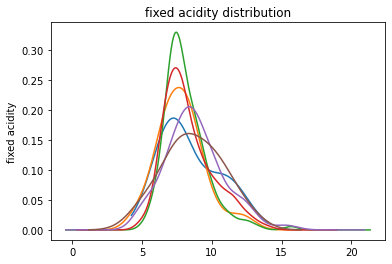

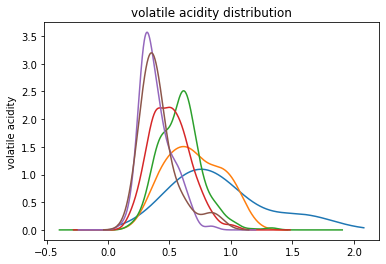

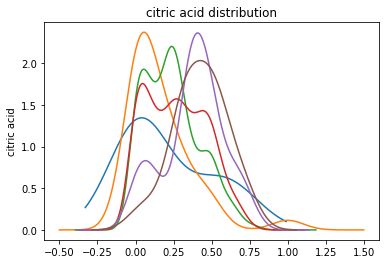

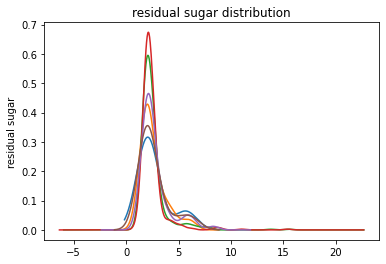

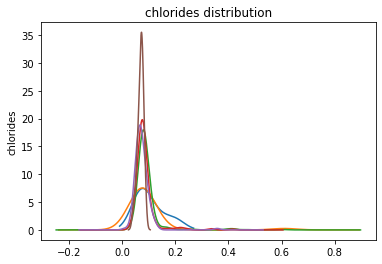

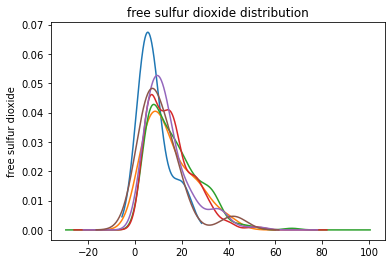

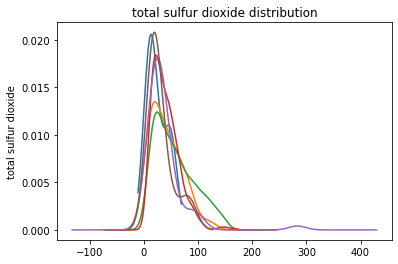

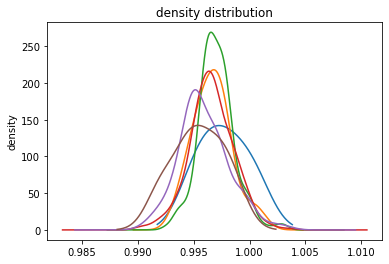

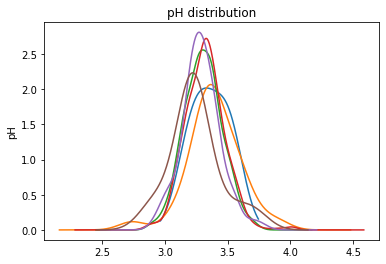

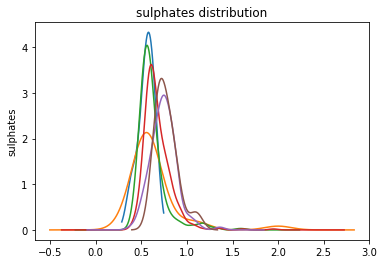

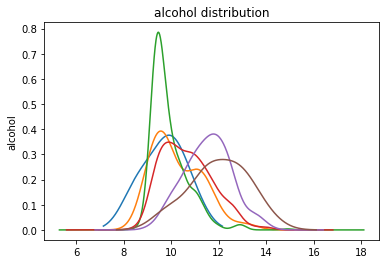

In [32]:
for column in feature_columns:
    for quality in sorted(data.quality.unique()):
        data[data["quality"] == quality][column].plot.kde()
    
    plt.gca().set(title=f"{column} distribution", ylabel=column)
    plt.show()

### Análise de Box Plot

Podemos ver uma grande quantidade de possíveis outliers para tratarmos.

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(data[feature_columns])
normalized = pd.DataFrame(scaler.transform(data[feature_columns]), columns=feature_columns)

px.box(normalized)

## Dados Duplicados

Existem dados duplicados, podemos removê-los visto que as informações não trazem novidades.

In [27]:
len(data) - len(data.drop_duplicates())

125

In [28]:
data = data.drop_duplicates()

## Balanceamento de Dados

Podemos ver que existe certo desbalanceamento dos dados, o que podemos tratar posteriormente.

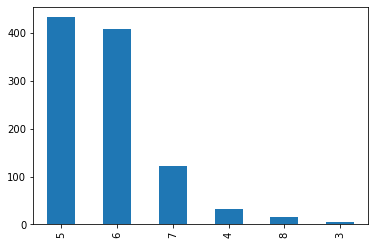

In [29]:
data["quality"].value_counts().plot.bar()

# Separação e Teste

In [40]:
from sklearn.model_selection import train_test_split

In [42]:
data_train, data_test = train_test_split(data, train_size=2/3, random_state=42)

In [44]:
X_train = data_train[feature_columns]
Y_train = data_train["quality"]

In [45]:
X_test = data_test[feature_columns]
Y_test = data_test["quality"]

# Balanceamento de Dados

Para utilizarmos em nossos testes posteriormente, também criaremos os dataframes balanceados.

In [54]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_train_balanceado, Y_train_balanceado = ros.fit_resample(X_train, Y_train)

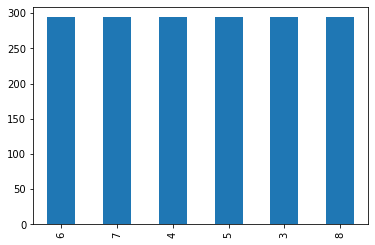

In [49]:
Y_train_balanceado.value_counts().plot.bar()

# Teste de Classificação

## Regressão Logística

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [93]:
def train_logistic_regression(X_train, Y_train, X_test, Y_test, max_iter=1000):
    scaler = StandardScaler()
    model = LogisticRegression(random_state=42, multi_class="multinomial", max_iter=max_iter)
    logistic_regression_pipeline = Pipeline(
        steps=[("scaler", scaler), ("logistic", model)]
    )

    logistic_regression_pipeline.fit(X_train, Y_train)
    Y_pred = model.predict(X_test.values)

    print("Acurácia:", metrics.accuracy_score(Y_test.tolist(), Y_pred))
    print("Precision Micro:", metrics.precision_score(Y_test.tolist(), Y_pred, average='micro', zero_division=0))
    print("Precision Macro:", metrics.precision_score(Y_test.tolist(), Y_pred, average='macro', zero_division=0))
    print("Recall Micro:", metrics.recall_score(Y_test.tolist(), Y_pred, average='micro', zero_division=0))
    print("Recall Macro:", metrics.recall_score(Y_test.tolist(), Y_pred, average='macro', zero_division=0))
    print("F1-score Micro:", metrics.f1_score(Y_test.tolist(), Y_pred, average='micro', zero_division=0))
    print("F1-score Macro:", metrics.f1_score(Y_test.tolist(), Y_pred, average='macro', zero_division=0))

    matriz_confusao = metrics.confusion_matrix(Y_test.tolist(), Y_pred, labels=model.classes_)
    metrics.ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=model.classes_).plot()

Acurácia: 0.3205882352941177
Precision Micro: 0.3205882352941177
Precision Macro: 0.2995964006881038
Recall Micro: 0.3205882352941177
Recall Macro: 0.24254266294653717
F1-score Micro: 0.3205882352941177
F1-score Macro: 0.14304287858504725


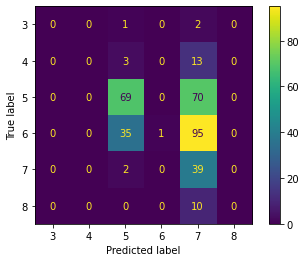

In [94]:
train_logistic_regression(X_train, Y_train, X_test, Y_test)

Acurácia: 0.2323529411764706
Precision Micro: 0.2323529411764706
Precision Macro: 0.14587031315057084
Recall Micro: 0.2323529411764706
Recall Macro: 0.20936421594431773
F1-score Micro: 0.2323529411764706
F1-score Macro: 0.10835873983739837


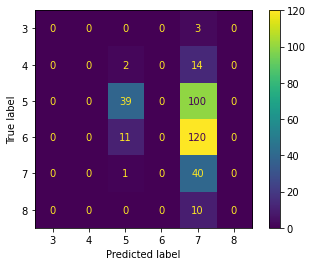

In [95]:
train_logistic_regression(X_train_balanceado, Y_train_balanceado, X_test, Y_test)

## Support Vector Machine - SVC

In [80]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [104]:
def train_svc(X_train, Y_train, X_test, Y_test, max_iter=1000):
    scaler = StandardScaler()
    model = SVC(random_state=42, gamma='auto')
    svc_pipeline = Pipeline(
        steps=[("scaler", scaler), ("svc", model)]
    )

    svc_pipeline.fit(X_train, Y_train)
    Y_pred = model.predict(X_test.values)

    print("Acurácia:", metrics.accuracy_score(Y_test.tolist(), Y_pred))
    print("Precision Micro:", metrics.precision_score(Y_test.tolist(), Y_pred, average='micro', zero_division=0))
    print("Precision Macro:", metrics.precision_score(Y_test.tolist(), Y_pred, average='macro', zero_division=0))
    print("Recall Micro:", metrics.recall_score(Y_test.tolist(), Y_pred, average='micro', zero_division=0))
    print("Recall Macro:", metrics.recall_score(Y_test.tolist(), Y_pred, average='macro', zero_division=0))
    print("F1-score Micro:", metrics.f1_score(Y_test.tolist(), Y_pred, average='micro', zero_division=0))
    print("F1-score Macro:", metrics.f1_score(Y_test.tolist(), Y_pred, average='macro', zero_division=0))

    matriz_confusao = metrics.confusion_matrix(Y_test.tolist(), Y_pred, labels=model.classes_)
    metrics.ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=model.classes_).plot()

Acurácia: 0.4088235294117647
Precision Micro: 0.4088235294117647
Precision Macro: 0.06813725490196078
Recall Micro: 0.4088235294117647
Recall Macro: 0.16666666666666666
F1-score Micro: 0.4088235294117647
F1-score Macro: 0.09672929714683369


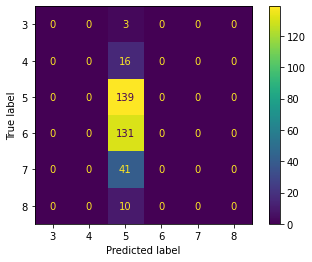

In [105]:
train_svc(X_train, Y_train, X_test, Y_test)

Acurácia: 0.4088235294117647
Precision Micro: 0.4088235294117647
Precision Macro: 0.06813725490196078
Recall Micro: 0.4088235294117647
Recall Macro: 0.16666666666666666
F1-score Micro: 0.4088235294117647
F1-score Macro: 0.09672929714683369


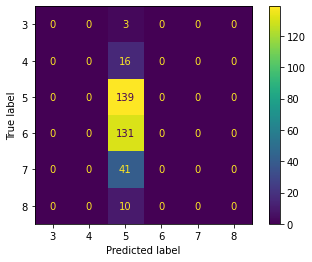

In [106]:
train_svc(X_train_balanceado, Y_train_balanceado, X_test, Y_test)

## Naive Bayes Classifier

Comentar sobre isso https://stats.stackexchange.com/questions/254723/standardisation-in-naive-bayes

In [109]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [116]:
def train_naive_bayes(X_train, Y_train, X_test, Y_test, max_iter=1000):
    model = MultinomialNB()
    naivebayes_pipeline = Pipeline(
        steps=[("naive bayes", model)]
    )

    naivebayes_pipeline.fit(X_train.values, Y_train.values)
    Y_pred = model.predict(X_test.values)

    print("Acurácia:", metrics.accuracy_score(Y_test.tolist(), Y_pred))
    print("Precision Micro:", metrics.precision_score(Y_test.tolist(), Y_pred, average='micro', zero_division=0))
    print("Precision Macro:", metrics.precision_score(Y_test.tolist(), Y_pred, average='macro', zero_division=0))
    print("Recall Micro:", metrics.recall_score(Y_test.tolist(), Y_pred, average='micro', zero_division=0))
    print("Recall Macro:", metrics.recall_score(Y_test.tolist(), Y_pred, average='macro', zero_division=0))
    print("F1-score Micro:", metrics.f1_score(Y_test.tolist(), Y_pred, average='micro', zero_division=0))
    print("F1-score Macro:", metrics.f1_score(Y_test.tolist(), Y_pred, average='macro', zero_division=0))

    matriz_confusao = metrics.confusion_matrix(Y_test.tolist(), Y_pred, labels=model.classes_)
    metrics.ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=model.classes_).plot()

Acurácia: 0.4117647058823529
Precision Micro: 0.4117647058823529
Precision Macro: 0.17394297341578138
Recall Micro: 0.4117647058823529
Recall Macro: 0.227421116541881
F1-score Micro: 0.4117647058823529
F1-score Macro: 0.17488462539653127


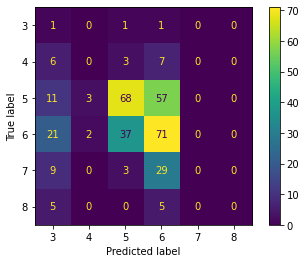

In [117]:
train_naive_bayes(X_train, Y_train, X_test, Y_test)

Acurácia: 0.2323529411764706
Precision Micro: 0.2323529411764706
Precision Macro: 0.23678807088422785
Recall Micro: 0.2323529411764706
Recall Macro: 0.2591201112839016
F1-score Micro: 0.2323529411764706
F1-score Macro: 0.16615862140796525


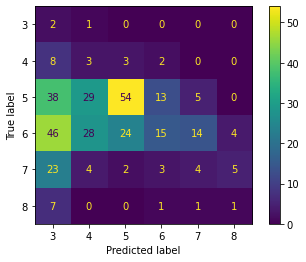

In [119]:
train_naive_bayes(X_train_balanceado, Y_train_balanceado, X_test, Y_test)